<a href="https://colab.research.google.com/github/33Surya66/Coronary-Heart-Disease/blob/main/DSBI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/sleep_cycle_productivity.csv")
print(data.head())
data.shape

         Date  Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
0  01-03-2024       1594   30   Other             23.93            5.66   
1  30-03-2024       3036   48   Other             21.13            6.62   
2  10-10-2024       2128   53  Female             21.25            2.91   
3  26-12-2024       5898   22   Other             21.50            2.05   
4  24-08-2024       4057   25    Male             22.62            3.60   

   Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
0               5.73              6                   18   
1               9.49             10                   18   
2               5.66              6                   18   
3               4.55              5                   18   
4               4.98              6                   18   

   Caffeine Intake (mg)  Screen Time Before Bed (mins)  Work Hours (hrs/day)  \
0                    95                            100              7.928426   
1                   106     

(5000, 15)

In [ ]:
new_data = data.select_dtypes(include = 'number')
df = pd.DataFrame(new_data)
df.head()

Person_ID  Age  Sleep Start Time  Sleep End Time  Total Sleep Hours  \
0       1594   30             23.93            5.66               5.73   
1       3036   48             21.13            6.62               9.49   
2       2128   53             21.25            2.91               5.66   
3       5898   22             21.50            2.05               4.55   
4       4057   25             22.62            3.60               4.98   

   Sleep Quality  Exercise (mins/day)  Caffeine Intake (mg)  \
0              6                   18                    95   
1             10                   18                   106   
2              6                   18                    55   
3              5                   18                    79   
4              6                   18                    26   

   Screen Time Before Bed (mins)  Work Hours (hrs/day)  Productivity Score  \
0                            100              7.928426                   8   
1                            121              5.060390                   1   
2                            112              7.134487                   2   
3                             43              5.985383                   4   
4                             73              8.321160                   9   

   Mood Score  Stress Level  
0           2             1  
1           8             1  
2           6             1  
3           5             1  
4           2             1

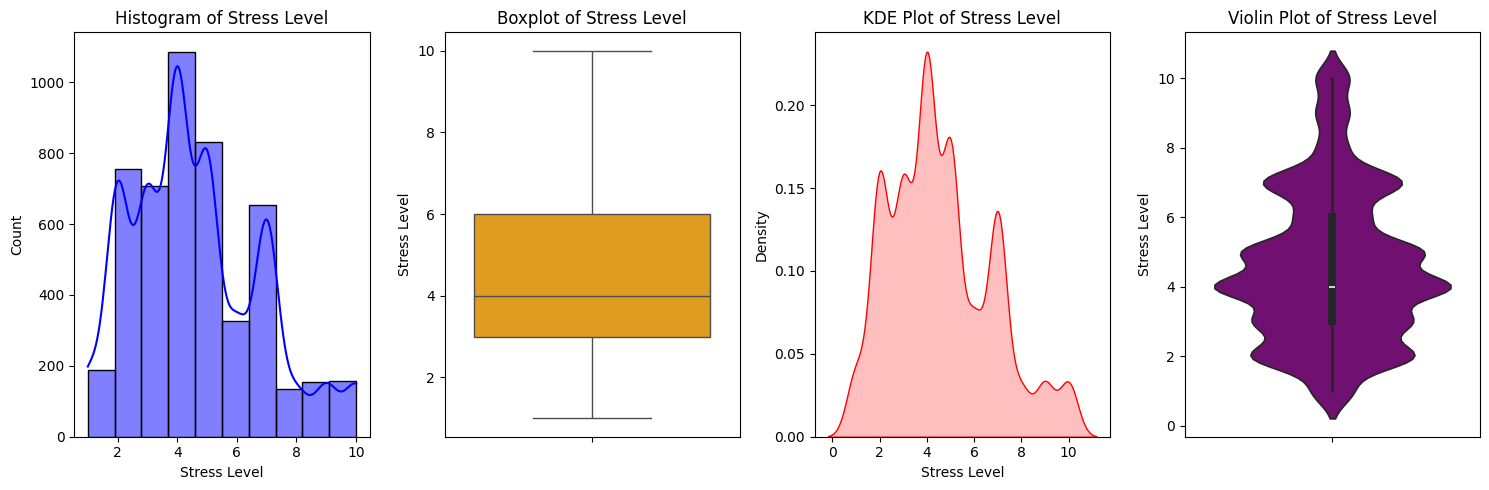

In [ ]:
#unviariate analysis
def univariate_graphical_analysis(data, column):
  plt.figure(figsize=(15,5))

  #Histogram
  plt.subplot(1,4,1)
  sns.histplot(data[column], kde=True, bins=10, color='blue')
  plt.title(f"Histogram of {column}")

  #boxplot
  plt.subplot(1,4,2)
  sns.boxplot(y=data[column], color='orange')
  plt.title(f"Boxplot of {column}")

  #KDE (Kernel Density Estimation) Plot
  plt.subplot(1,4,3)
  sns.kdeplot(data[column], shade=True, color='red')
  plt.title(f"KDE Plot of {column}")

  #Violin Plot
  plt.subplot(1,4,4)
  sns.violinplot(y=data[column], color='purple')
  plt.title(f"Violin Plot of {column}")

  plt.tight_layout()
  plt.show()

univariate_graphical_analysis(df, 'Stress Level')


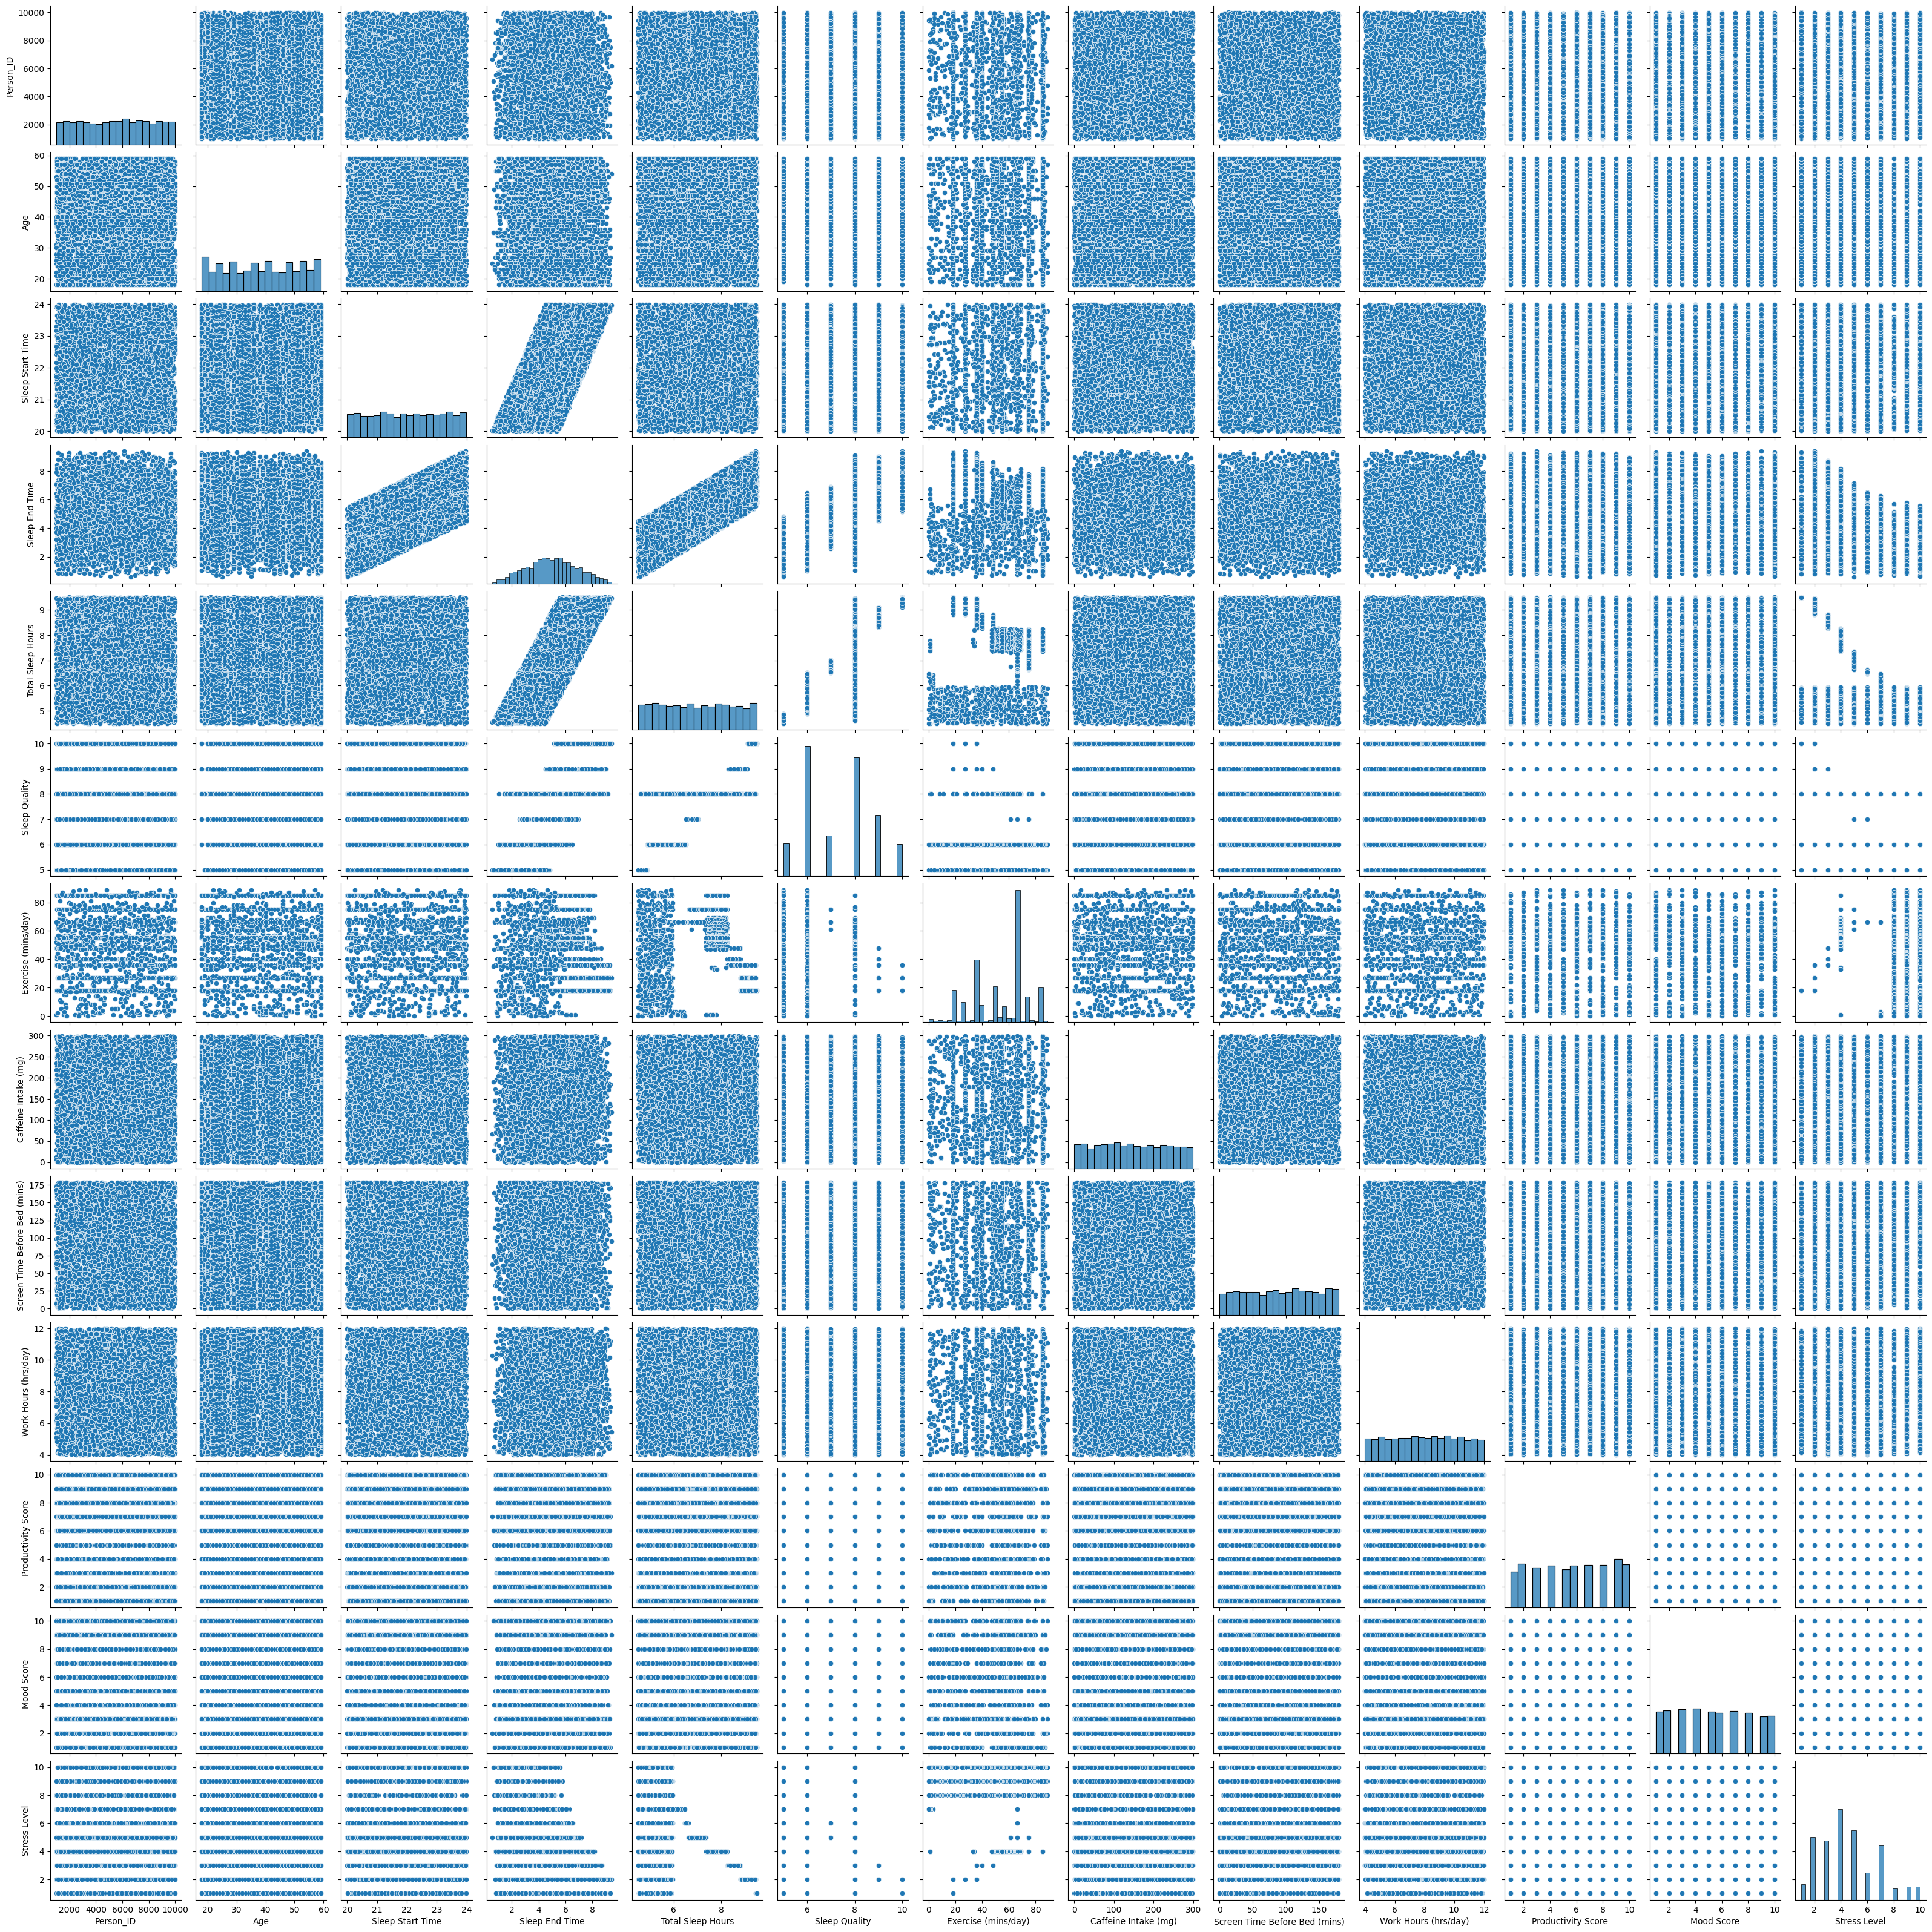

In [ ]:
#multivariate analysis
sns.pairplot(df)

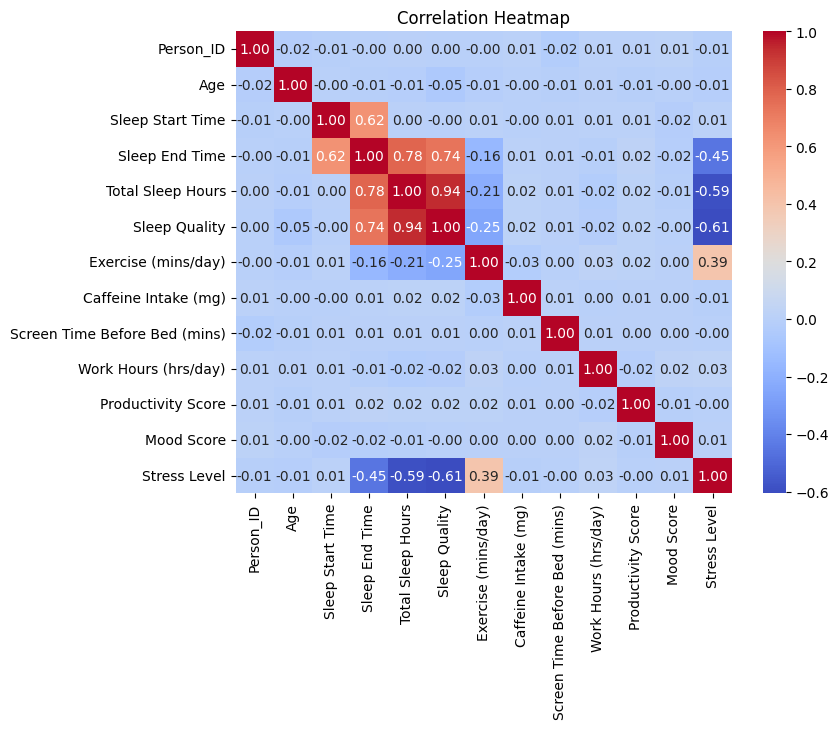

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

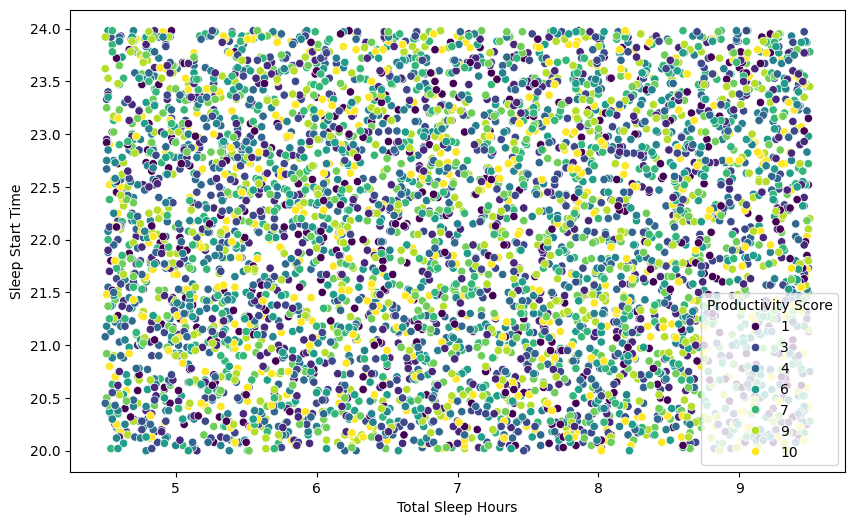

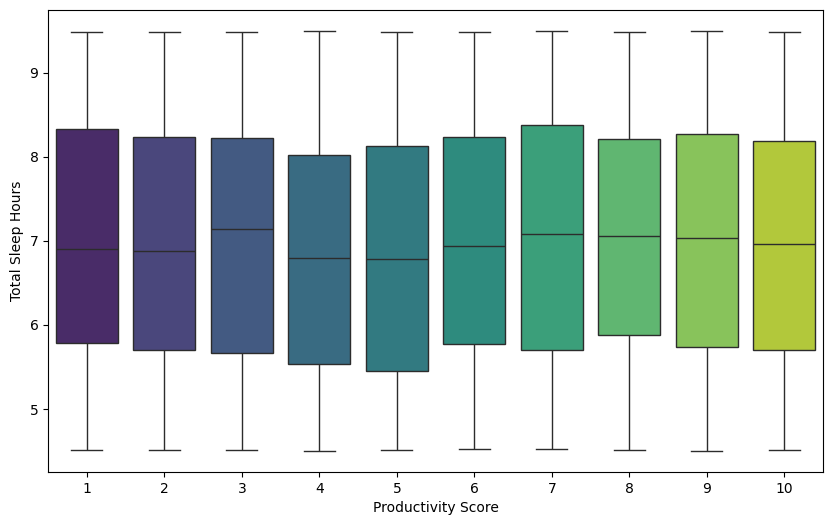

In [ ]:
#Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Sleep Hours', y='Sleep Start Time', hue='Productivity Score', data=df, palette='viridis')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Productivity Score', y='Total Sleep Hours', data=df, palette='viridis')
plt.show()

In [ ]:
df.columns

Index(['Person_ID', 'Age', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)',
       'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score',
       'Stress Level'],
      dtype='object')

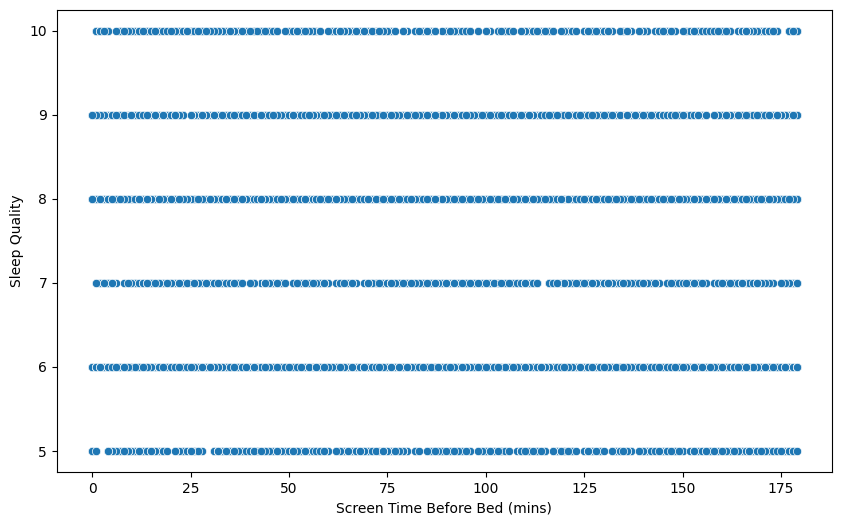

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Time Before Bed (mins)', y='Sleep Quality', data=df, palette='viridis')
plt.show()

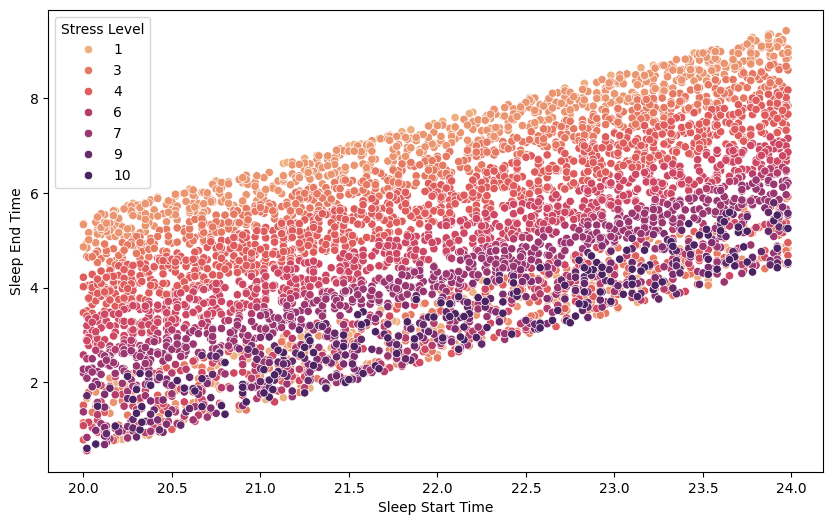

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Start Time', y='Sleep End Time', data=df,hue="Stress Level", palette='flare')
plt.show()

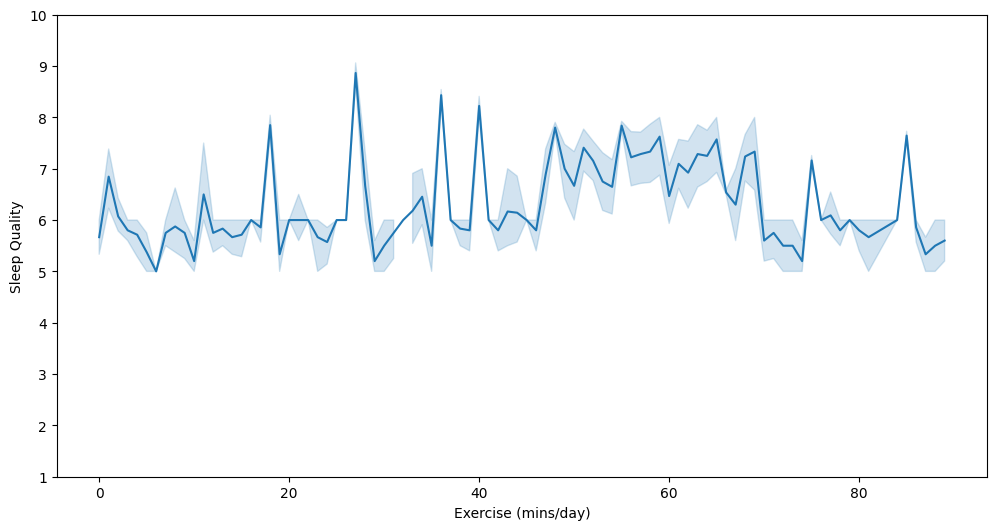

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Exercise (mins/day)', y='Sleep Quality', data=df)
plt.ylim(1,10)
plt.show()

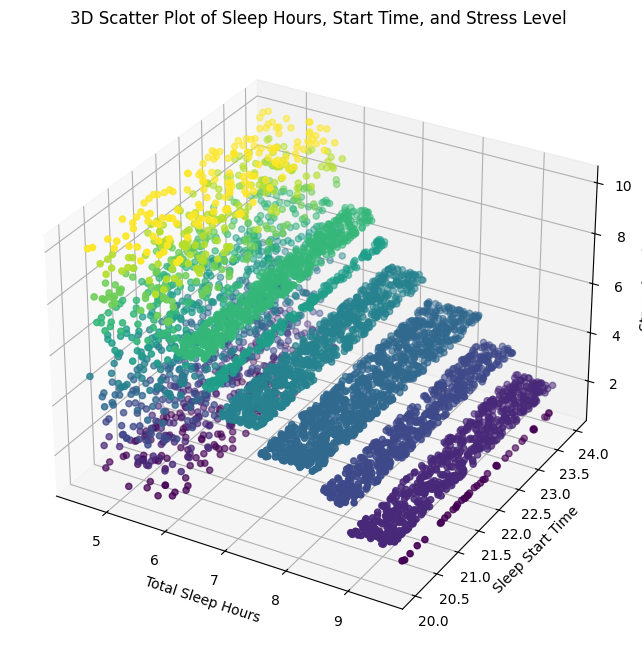

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Total Sleep Hours']
y = df['Sleep Start Time']
z = df['Stress Level']

ax.scatter(x, y, z, c=z, cmap='viridis')  # Use 'Stress Level' for color

ax.set_xlabel('Total Sleep Hours')
ax.set_ylabel('Sleep Start Time')
ax.set_zlabel('Stress Level')
ax.set_title('3D Scatter Plot of Sleep Hours, Start Time, and Stress Level')

plt.show()


In [ ]:
import sqlite3
conn = sqlite3.connect('sleep_cycle_productivity.db')
df.to_sql('sleep_cycle_productivity', conn, if_exists='replace', index=False)

5000

In [ ]:
cursor = conn.cursor()
data_row = (1860, 32, 23.33, 4.61, 5.28, 3, 86, 87, 116, 8.808920094, 8, 3, 6)

cursor.execute("INSERT INTO sleep_cycle_productivity VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",data_row)
conn.commit()

In [ ]:
#delete
cursor.execute("DELETE FROM sleep_cycle_productivity WHERE Age = 18")
conn.commit()

In [ ]:
cursor.execute("SELECT * FROM sleep_cycle_productivity WHERE Age = 19")
rows = cursor.fetchall()
for row in rows:
    print(row)

(4075, 19, 23.37, 4.82, 5.46, 8, 18, 57, 106, 10.3977194, 8, 1, 1)
(8717, 19, 20.67, 1.53, 4.87, 8, 18, 15, 93, 8.026420834, 4, 8, 1)
(2750, 19, 22.33, 4.11, 5.77, 8, 18, 166, 59, 11.65828487, 7, 7, 1)
(8505, 19, 21.05, 6.43, 9.38, 8, 18, 201, 72, 9.051988442, 1, 7, 2)
(3981, 19, 20.13, 1.45, 5.32, 8, 18, 123, 72, 5.977415752, 2, 5, 2)
(2051, 19, 22.6, 7.52, 8.92, 8, 18, 217, 176, 6.252928337, 10, 4, 2)
(6426, 19, 23.12, 8.35, 9.24, 8, 18, 216, 120, 8.110001616, 5, 7, 2)
(6109, 19, 22.25, 2.94, 4.69, 5, 18, 291, 44, 7.982807194, 3, 3, 2)
(4568, 19, 22.45, 3.6, 5.15, 8, 18, 151, 55, 11.64643821, 3, 7, 2)
(1869, 19, 21.8, 7.2, 9.4, 8, 18, 200, 33, 5.566270455, 5, 1, 2)
(6909, 19, 23.17, 8.03, 8.86, 8, 18, 18, 156, 11.03183347, 9, 2, 2)
(6387, 19, 23.98, 9.05, 9.06, 8, 27, 107, 98, 11.22203737, 7, 2, 2)
(3428, 19, 21.77, 3.62, 5.85, 8, 27, 67, 114, 4.991651591, 9, 3, 2)
(5988, 19, 22.72, 7.88, 9.17, 8, 27, 231, 103, 6.9010334, 10, 1, 2)
(1916, 19, 23.53, 8.75, 9.21, 8, 27, 243, 151, 6.847

In [ ]:
#update
cursor.execute("UPDATE sleep_cycle_productivity SET Age = 21 WHERE Age = 19")
conn.commit()
conn.close()

Mean Squared Error: 7.074504598022034e-30
R-squared: 1.0


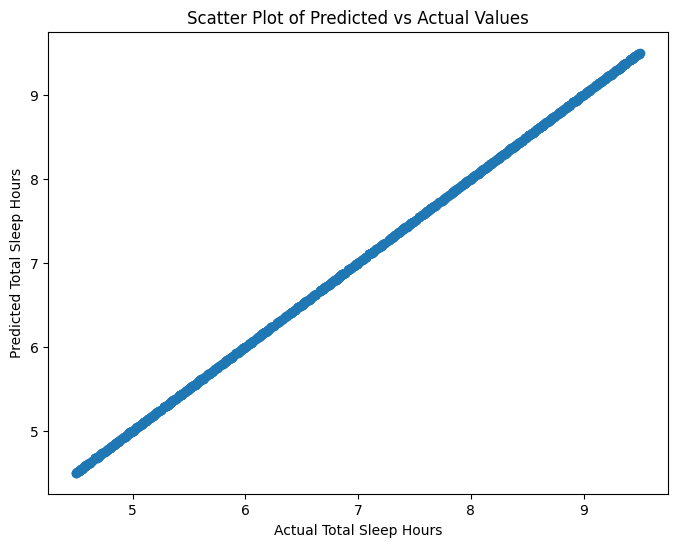

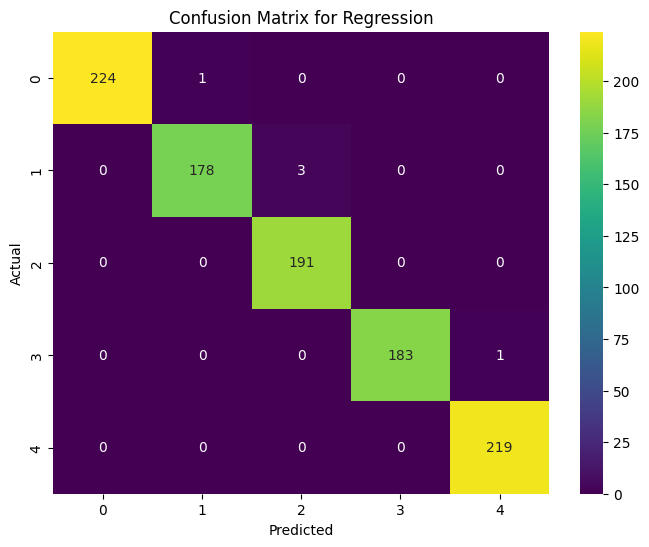

In [ ]:
#Predictive model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#train test split
X = df.drop(columns=['Sleep Quality'])
y = df['Total Sleep Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

# Evaluation metrics for regression
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Sleep Hours")
plt.ylabel("Predicted Total Sleep Hours")
plt.title("Scatter Plot of Predicted vs Actual Values")
plt.show()

num_bins = 5  # Number of bins to create
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# Create the confusion matrix
confusion_matrix = pd.crosstab(y_test_bins, y_pred_bins, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='viridis', fmt="d")
plt.title("Confusion Matrix for Regression")
plt.show()

Mean Squared Error: 0.02960069311000007
R-squared: 0.9867848796543771


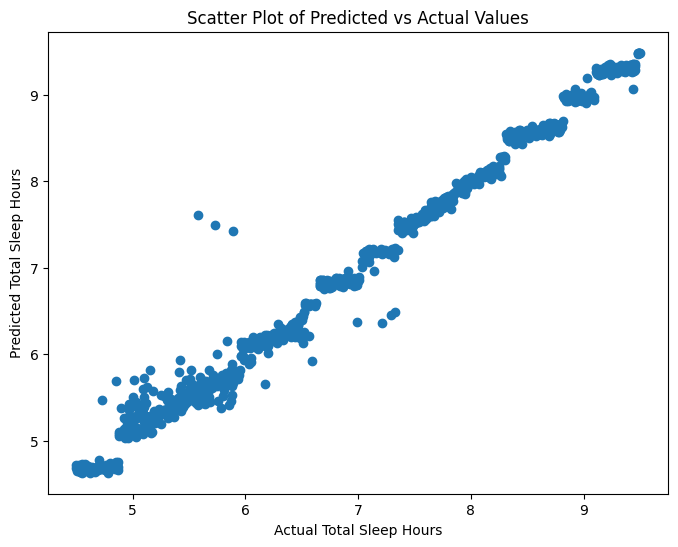

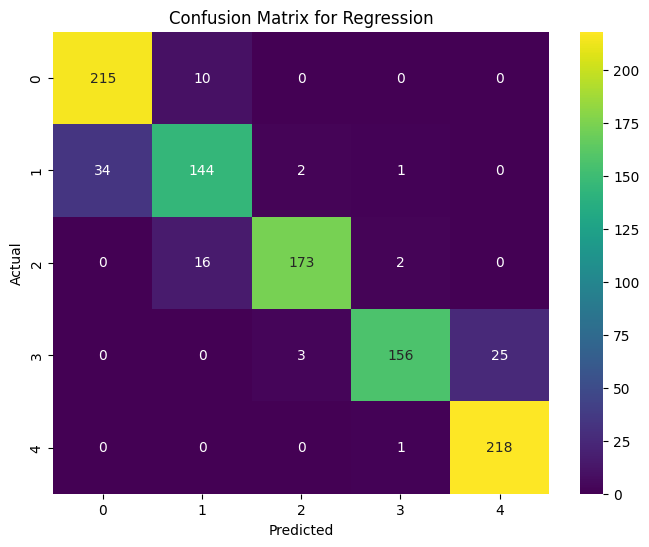

In [ ]:
#use some other model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#train test split
X = df.drop(columns=['Total Sleep Hours'])
y = df['Total Sleep Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Fixed this line


#RandomFOrest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Sleep Hours")
plt.ylabel("Predicted Total Sleep Hours")
plt.title("Scatter Plot of Predicted vs Actual Values")
plt.show()

num_bins = 5  # Number of bins to create
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# Create the confusion matrix
confusion_matrix = pd.crosstab(y_test_bins, y_pred_bins, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='viridis', fmt="d")
plt.title("Confusion Matrix for Regression")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed to Classifier
from sklearn.metrics import accuracy_score

# ... (Your existing code for loading and preprocessing data) ...

# Create Sleep Categories
df['Sleep_Category'] = pd.cut(df['Total Sleep Hours'],
                               bins=[0, 6, 8, float('inf')],
                               labels=['Low', 'Moderate', 'High'])

# Train-Test Split
X = df.drop(columns=['Total Sleep Hours', 'Sleep_Category'])  # Exclude original and new target
y = df['Sleep_Category']  # Use the new categorical target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Changed to Classifier
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.936


Accuracy: 0.847


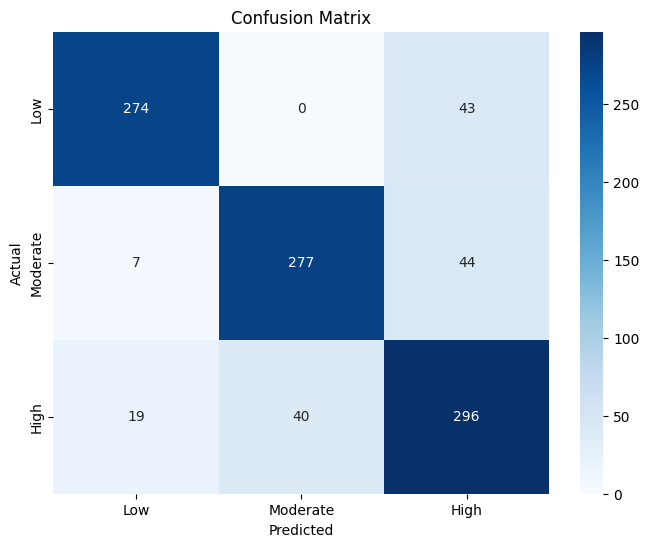

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for loading and preprocessing data) ...

# Create Sleep Categories (if not already created)
df['Sleep_Category'] = pd.cut(df['Total Sleep Hours'],
                               bins=[0, 6, 8, float('inf')],
                               labels=['Low', 'Moderate', 'High'])

# Train-Test Split
X = df.drop(columns=['Total Sleep Hours', 'Sleep_Category'])
y = df['Sleep_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier
model = LogisticRegression(max_iter=1000, multi_class='auto')  # Increased max_iter
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Linear Regression:
  MSE: 0.0000
  R-squared: 1.0000

Random Forest Regressor:
  MSE: 0.0296
  R-squared: 0.9868

Logistic Regression:
  Accuracy: 0.8470

Random Forest Classifier:
  Accuracy: 0.9360


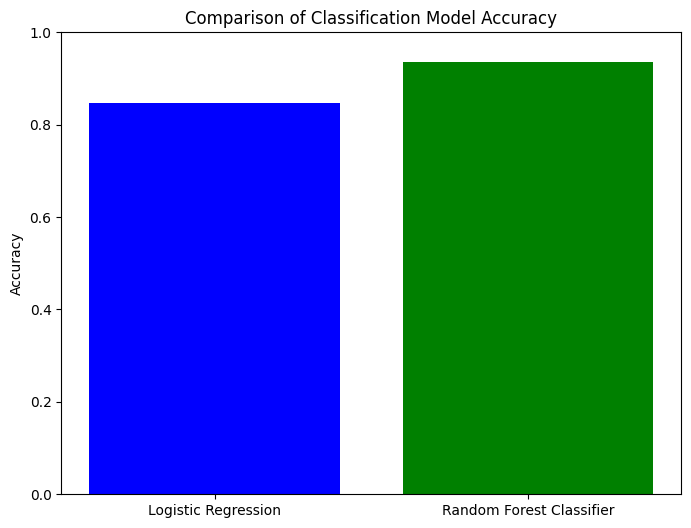

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ... (Your existing code for loading and preprocessing data) ...

# Create Sleep Categories
df['Sleep_Category'] = pd.cut(df['Total Sleep Hours'],
                               bins=[0, 6, 8, float('inf')],
                               labels=['Low', 'Moderate', 'High'])

# Prepare data for regression models
X_reg = df.drop(columns=['Total Sleep Hours', 'Sleep_Category'])
y_reg = df['Total Sleep Hours']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Prepare data for classification models
X_class = df.drop(columns=['Total Sleep Hours', 'Sleep_Category'])
y_class = df['Sleep_Category']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)
y_pred_linear_reg = linear_reg_model.predict(X_test_reg)
mse_linear_reg = mean_squared_error(y_test_reg, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test_reg, y_pred_linear_reg)

# Random Forest Regressor
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)
mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# Logistic Regression
logistic_reg_model = LogisticRegression(max_iter=1000, multi_class='auto')
logistic_reg_model.fit(X_train_class, y_train_class)
y_pred_logistic_reg = logistic_reg_model.predict(X_test_class)
accuracy_logistic_reg = accuracy_score(y_test_class, y_pred_logistic_reg)

# Random Forest Classifier
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_model.fit(X_train_class, y_train_class)
y_pred_rf_class = rf_class_model.predict(X_test_class)
accuracy_rf_class = accuracy_score(y_test_class, y_pred_rf_class)

# Print results
print("Linear Regression:")
print(f"  MSE: {mse_linear_reg:.4f}")
print(f"  R-squared: {r2_linear_reg:.4f}")

print("\nRandom Forest Regressor:")
print(f"  MSE: {mse_rf_reg:.4f}")
print(f"  R-squared: {r2_rf_reg:.4f}")

print("\nLogistic Regression:")
print(f"  Accuracy: {accuracy_logistic_reg:.4f}")

print("\nRandom Forest Classifier:")
print(f"  Accuracy: {accuracy_rf_class:.4f}")

# Create a bar plot to compare accuracy
models = ['Logistic Regression', 'Random Forest Classifier']
accuracies = [accuracy_logistic_reg, accuracy_rf_class]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Model Accuracy")
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.show()